In [1]:
from transformers import CLIPProcessor, CLIPModel
import torch
import torchvision
from torchvision.models import resnet50
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import clip
from PIL import Image
import requests
import torch.hub
import time
import pickle
import math

from utils import matching, stats, proggan, nethook, zdataset, loading, plotting, layers, visualizations

In [2]:
device = torch.device('cuda:0')

In [3]:
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample,
                                       save_as_images, display_in_terminal)

gan = BigGAN.from_pretrained('biggan-deep-256').to(device)

for p in gan.parameters(): 
    p.data = p.data.float() 
    
gan_layers = []
for name, layer in gan.named_modules():
    if "conv" in name:
        gan_layers.append(name)
        
        


# gan = nethook.InstrumentedModel(gan)
# gan.retain_layers(gan_layers)

clipmodel, preprocess = clip.load("RN50", device=device)
clip_layers = [ "visual.layer1", "visual.layer2", "visual.layer3", "visual.layer4"]
for p in clipmodel.parameters(): 
    p.data = p.data.float() 
    
# clipmodel = nethook.InstrumentedModel(clipmodel)
# clipmodel.retain_layers(clip_layers)

In [4]:
ganlayers, cliplayers = layers.get_layers(gan,gan_layers, clipmodel, clip_layers, device)

In [5]:
table, gan_stats, clip_stats = loading.load_stats("/home/amildravid/bigActivation_Matching/results", device)

Loading...
Done


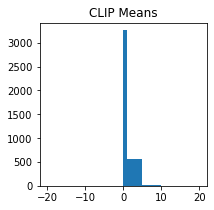

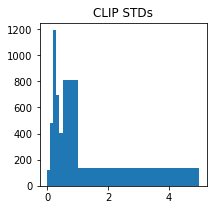

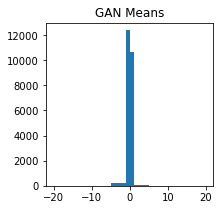

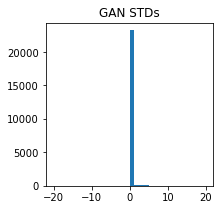

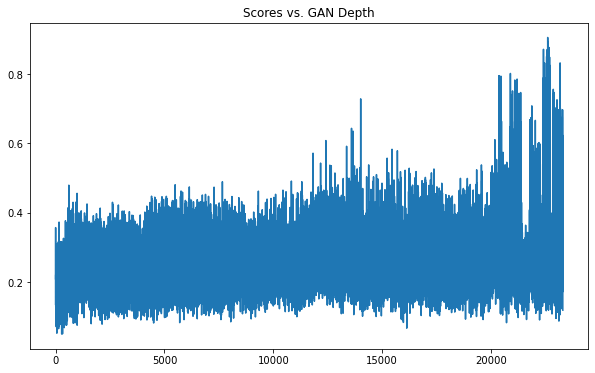

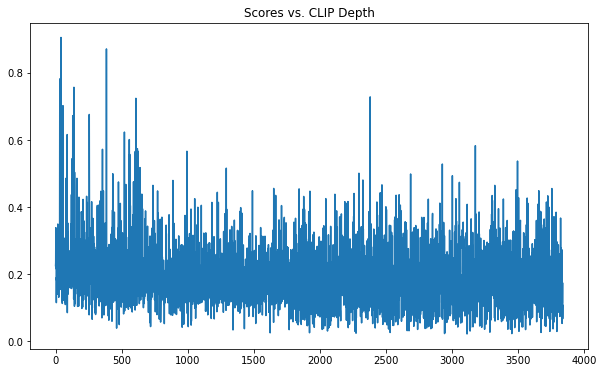

In [6]:
plotting.plot_stats(gan_stats, clip_stats, table)

In [7]:
gan = nethook.InstrumentedModel(gan)
gan.retain_layers(gan_layers)

clipmodel = nethook.InstrumentedModel(clipmodel)
clipmodel.retain_layers(clip_layers)

In [8]:
z_dataset = torch.randn((1000,128)).to(device)
c_dataset = torch.zeros((1000,1000)).to(device)
num_c = 1
for iii in range(1000):
    c_dataset[num_c*iii:num_c*iii+num_c, iii] = 1


In [12]:
z_dataset = torch.randn((1,128)).to(device)
c_dataset = torch.zeros((1,1000)).to(device)
c_dataset[0, 207] = 1


generator.layers.1.conv_1


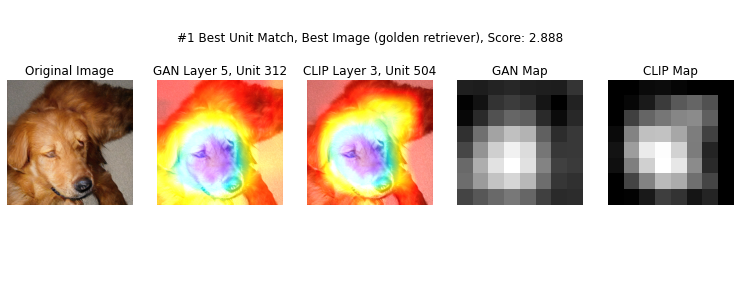

In [13]:
batch_size = 1
visualizations.Viz_Matches(1, table, gan, clipmodel, (z_dataset,c_dataset), ganlayers, cliplayers, gan_stats, clip_stats, batch_size)

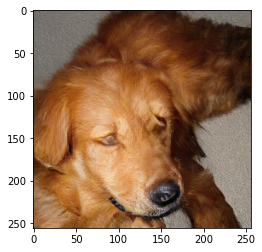

In [14]:
im = (np.transpose(gan(z_dataset, c_dataset,1).cpu().detach()[0], (1,2,0))+1)/2
plt.imshow(im)

In [41]:
def edit_units(data, model):
    map_size = data.shape[2]
    data[:,312,:,:] = 20#50*torch.randn((1,1, map_size, map_size))
    return data

gan.eval()
gan.edit_layer('generator.layers.1.conv_1', edit_units)

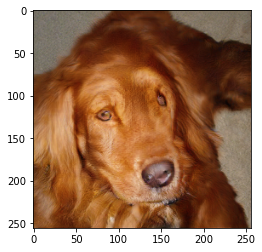

In [42]:
im = (np.transpose(gan(z_dataset, c_dataset,1).cpu().detach()[0], (1,2,0))+1)/2
plt.imshow(im)

In [26]:
gan

InstrumentedModel(
  (model): BigGAN(
    (embeddings): Linear(in_features=1000, out_features=128, bias=False)
    (generator): Generator(
      (gen_z): Linear(in_features=256, out_features=32768, bias=True)
      (layers): ModuleList(
        (0): GenBlock(
          (bn_0): BigGANBatchNorm(
            (scale): Linear(in_features=256, out_features=2048, bias=False)
            (offset): Linear(in_features=256, out_features=2048, bias=False)
          )
          (conv_0): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1))
          (bn_1): BigGANBatchNorm(
            (scale): Linear(in_features=256, out_features=512, bias=False)
            (offset): Linear(in_features=256, out_features=512, bias=False)
          )
          (conv_1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (bn_2): BigGANBatchNorm(
            (scale): Linear(in_features=256, out_features=512, bias=False)
            (offset): Linear(in_features=256, out_features=512, bias=Fa